### Calculating P-value

Load in the data below, and use the exercises to assist with answering the quiz questions below.

**If you get stuck, notice there is a solution notebook available by clicking on the orange jupyter icon in the top left!**

In [2]:
#Import libraries, set the seed, and read in the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

df = pd.read_csv('coffee_dataset.csv')

In [3]:
#create a sample from our data
sample_df = df.sample(150)

In [4]:
#create our bootstrap sample
bootsample = sample_df.sample(150, replace=True)

In [5]:
#Bootstrap from the sample
means = []
for _ in range(10000):
    bootsample = sample_df.sample(150,replace=True)
    means.append(bootsample.height.mean())

In [6]:
#Get the standard deviation
np.std(means)

0.26582463905558962

In [7]:
#create a random sample for the null values
null_vals = np.random.normal(70, np.std(means),10000)

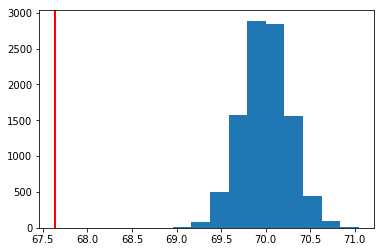

In [8]:
#Plot the null values
plt.hist(null_vals);
plt.axvline(sample_df.height.mean(),color='r', linewidth=2)

In [9]:
#Find the sample mean
sample_mean = sample_df.height.mean()

In [10]:
#Calculate the P-value
(null_vals > sample_mean).mean()

1.0

New scenario

$H_0: \mu \geq 70$

$H_1: \mu < 70$

In [13]:
(null_vals < sample_mean).mean()

0.0

New scenario

$H_0: \mu = 70$

$H_1: \mu \neq 70$

In [14]:
null_mean = 70
(null_vals < sample_mean).mean() + (null_vals > null_mean +(null_mean - sample_mean)).mean()

0.0

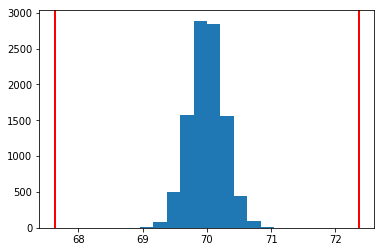

In [15]:
low = sample_mean
high = null_mean + (null_mean - sample_mean)

plt.hist(null_vals);
plt.axvline(low,color='r', linewidth=2)
plt.axvline(high,color='r', linewidth=2)